In [87]:
import os
import IPython.display as ipd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

import librosa
from librosa import display, beat
from librosa.feature import chroma_stft, melspectrogram
import glob 

from mutagen.easyid3 import EasyID3

## Quick look at Librosa

In [4]:
track_path = r"D:\Music\DnB\beatjunkierato+dnbpanacea1hitfreedl.mp3"
data, sampling_rate = librosa.load(track_path, sr=42000, res_type="kaiser_fast")

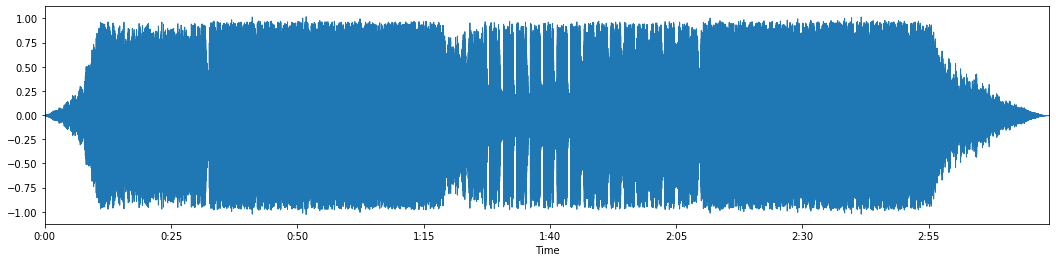

In [17]:
plt.figure(figsize=(18,4)) # sampling rate 22050
librosa.display.waveplot(data, sr=sampling_rate);   # Audio Time series that will be used to create spectrograms

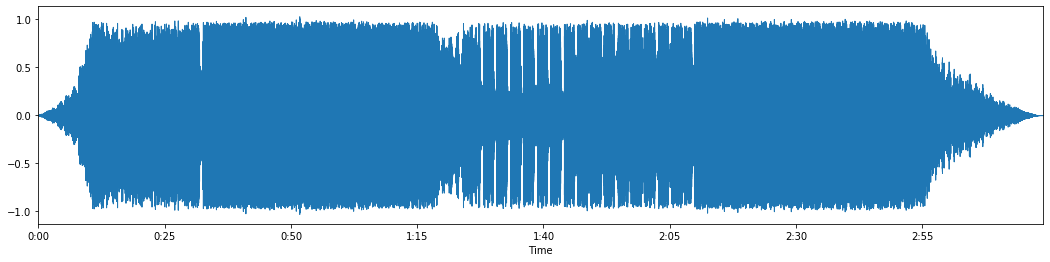

In [5]:
plt.figure(figsize=(18,4)) # sampling rate 42000
librosa.display.waveplot(data, sr=sampling_rate);   # Audio Time series that will be used to create spectrograms

In [30]:
# Estimate a static tempo
y, sr = librosa.load(r"D:\Music\DnB\beatjunkierato+dnbpanacea1hitfreedl.mp3")
onset_env = librosa.onset.onset_strength(y, sr=sr)
tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr, start_bpm=160)
tempo                                           

C:\Users\flake\Anaconda3\envs\GA_DSI\lib\site-packages\librosa\beat.py:309: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  hop_length=hop_length))


array([184.5703125])

## Exploring Mel-Freqency Cepstrums (MFC)

The MFC is a special way of representing the short-term power spectrum (how the power of a signal or sound is distributed over a frequency) of a sound, or in this case a song. 

The mel-frequency essentially takes the typical power spectrum, which represents power over the entire range the frequency, and maps it onto the [mel scale](https://en.wikipedia.org/wiki/Mel_scale).  The mel scale was developed in the late 1930's and the idea for it is:

- The range of human hearing is between 20Hz to 20kHz.
- Our perception of changes in frequency doesn't match the actual change. For example, we would perceive a sound at 300 Hz and 400 Hz as roughly the same but a 900 Hz sound and a 1 kHz sound would seem like a much larger difference even though there is still only a 100 Hz difference.
- The mel (from melody) scale attempts to create a equally spaced scale based on peoples perceived differences.  


There isn't a single formula for the mel-frequency but the most popular one is for a frequency (in Hz) $f$:

$$m = 2595\log_{10}{(1 + {{f}\over{700}})}$$

Since this is a $\log$ transform its technically not a frequency, so they coined the the term *quefr*ency and similarly they don't call it a spectrum they call it a *ceps*trum.

The Mel-frequency cepstral coefficients (MFCCs) make up the cepstrum and are commonly derived as followed (from wikipedia):

1. Take the [Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform) of (a windowed excerpt of) a signal.
2. Map the powers of the spectrum obtained above onto the mel scale, using triangular overlapping windows.
3. Take the logs of the powers at each of the mel frequencies.
4. Take the discrete cosine transform of the list of mel log powers, as if it were a signal.
5. The MFCCs are the amplitudes of the resulting spectrum.

MFCCs are especially useful in speech recognition and NLP with deep learning and increasingly more so in genre classification and other audio analysis problems. 

In [6]:
def plot_mfc(song, title):
    y, sr = librosa.load(song, sr=42000, res_type='kaiser_fast')

    # Let's make and display a mel-scaled power (energy-squared) spectrogram
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

    # Convert to log scale (dB). We'll use the peak power as reference.
    log_S = librosa.amplitude_to_db(S, ref=np.max)

    # Make a new figure
    plt.figure(figsize=(18,4))

    # Display the spectrogram on a mel scale
    # sample rate and hop length parameters are used to render the time axis
    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

    # Put a descriptive title on the plot
    plt.title(title + ' mel power spectrogram')

    # draw a color bar
    plt.colorbar(format='%+02.0f dB')

    # Make the figure layout compact
    plt.tight_layout()

In [13]:
def plot_chroma(file, title):
    
    # Load in the song using kaiser_fast to speed up loading
    X, sr = librosa.load(file, sr=42000, res_type='kaiser_fast')
    
    
    S = np.abs(librosa.stft(X, n_fft=4096))**2
    
    # Generating chromagram
    chroma = chroma_stft(S=S, sr=sr)
    
    plt.figure(figsize=(18,4))
    
    librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
    
    plt.colorbar()
    plt.title(title + ' Chromagram')
    plt.tight_layout()
    plt.show();

In [20]:
dnb = r"D:\Music\DnB\beatjunkierato+dnbpanacea1hitfreedl.mp3"
dubstep= r"D:\Music\Dubstep\Boss_Bass_-_03_-_Complex_World.mp3"
house = r"D:\Music\House\14-1671271-Mr.DeVo_-Is this my house_.mp3"
techno = r"D:\Music\Techno\01-1671255-Mr.DeVo_-Robocop on steroids.mp3"
indie = r"D:\Music\Indie-Rock\Jon_Worthy_and_the_Bends_-_03_-_Have_It_Your_Way.mp3"
garage = r"D:\Music\Garage\The_Wrong_Sister_-_08_-_Can_Life.mp3"

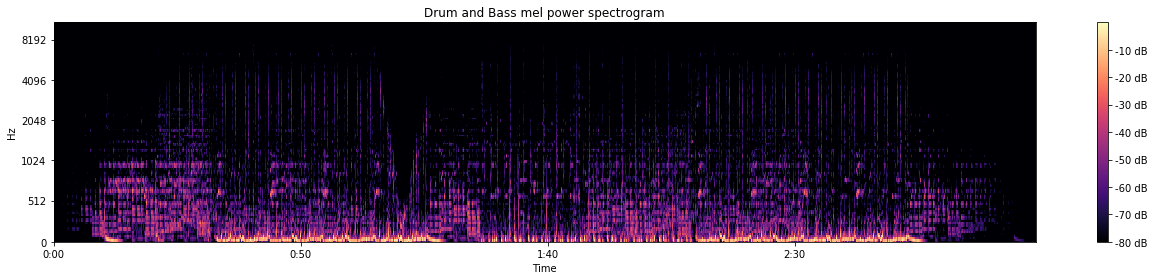

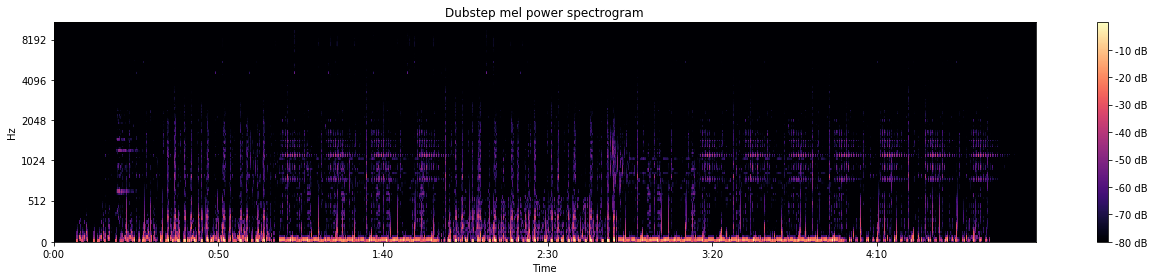

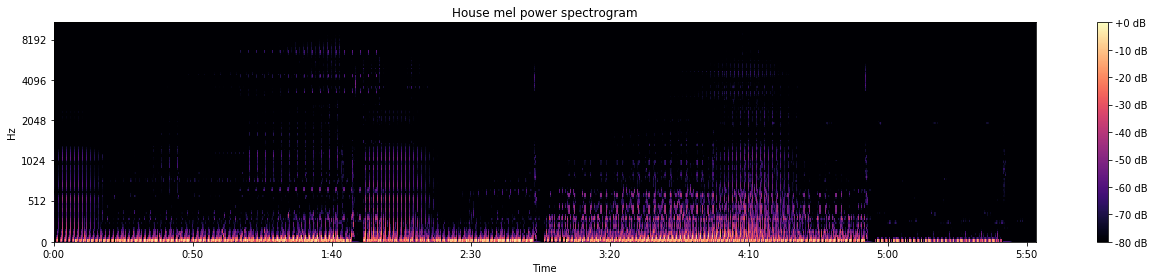

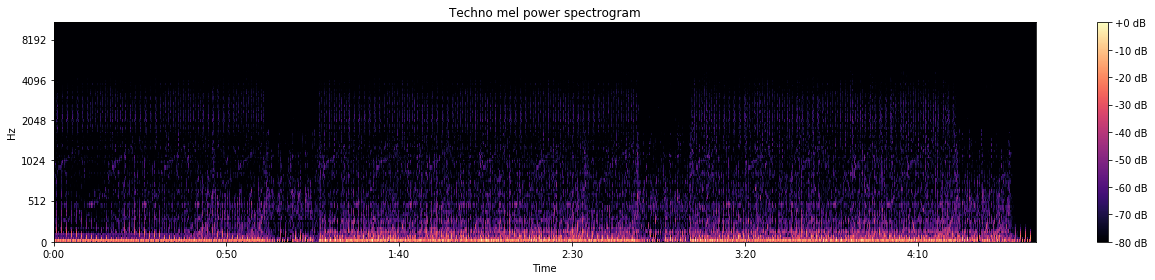

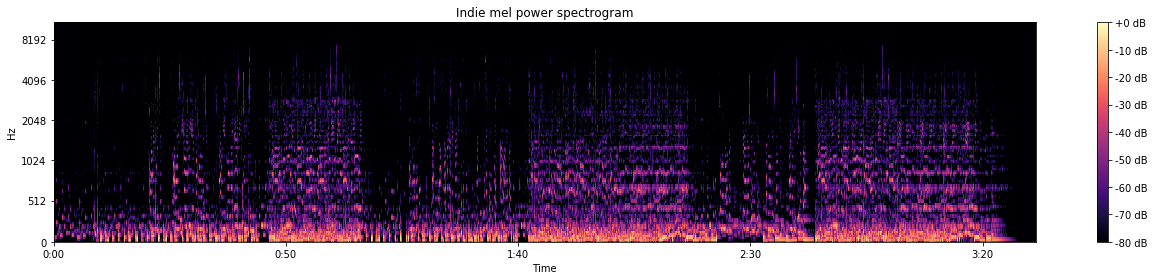

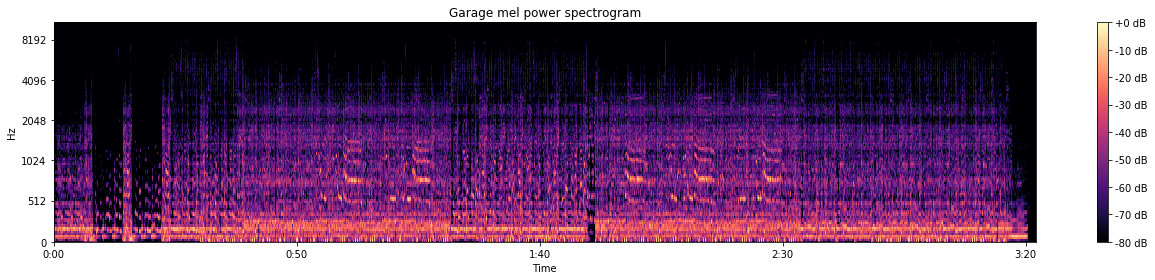

In [9]:
plot_mfc(dnb, 'Drum and Bass')
plot_mfc(dubstep, 'Dubstep')
plot_mfc(house, 'House')
plot_mfc(techno, 'Techno')
plot_mfc(indie, 'Indie')
plot_mfc(garage, "Garage")

In [56]:
# %%timeit
# y, sr = librosa.load(r"D:\Music\DnB\Noisia - Noisia Radio S04E22.mp3", res_type='kaiser_fast')
# S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

45.1 s ± 774 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [55]:
# %%timeit
# y, sr = librosa.load(r"D:\Music\House\14-1671271-Mr.DeVo_-Is this my house_.mp3", res_type='kaiser_fast')
# S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

4.92 s ± 28 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [53]:
# %%timeit
# X, sample_rate = librosa.load(r"D:\Music\House\14-1671271-Mr.DeVo_-Is this my house_.mp3", res_type='kaiser_fast') 
# librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40)

5.05 s ± 112 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [54]:
# %%timeit
# X, sample_rate = librosa.load(r"D:\Music\House\14-1671271-Mr.DeVo_-Is this my house_.mp3", res_type='kaiser_fast') 
# mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 

5.23 s ± 579 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


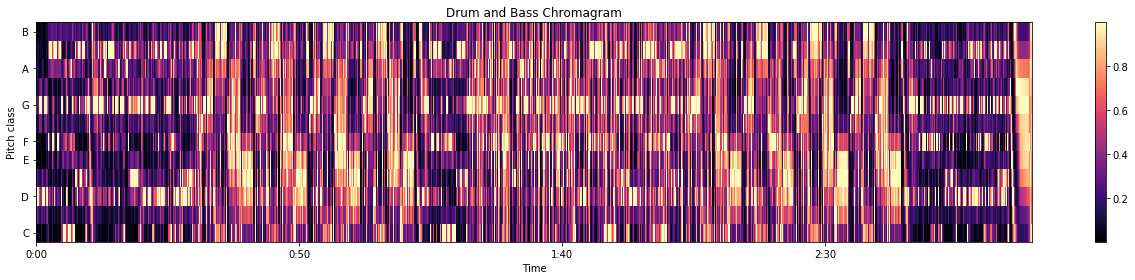

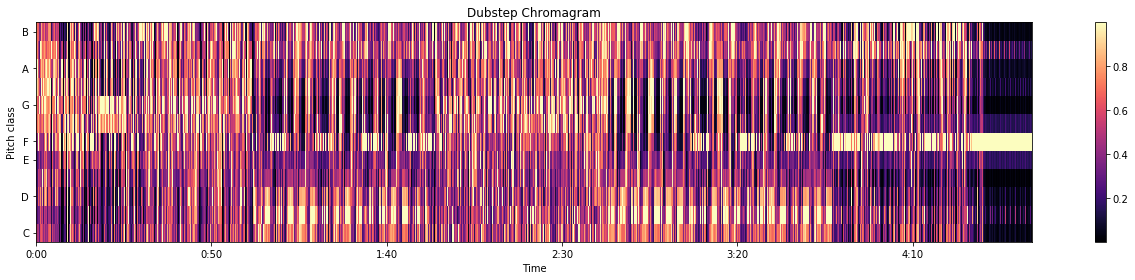

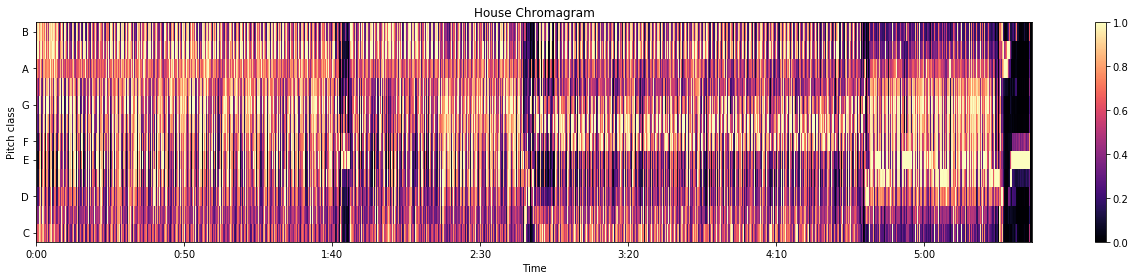

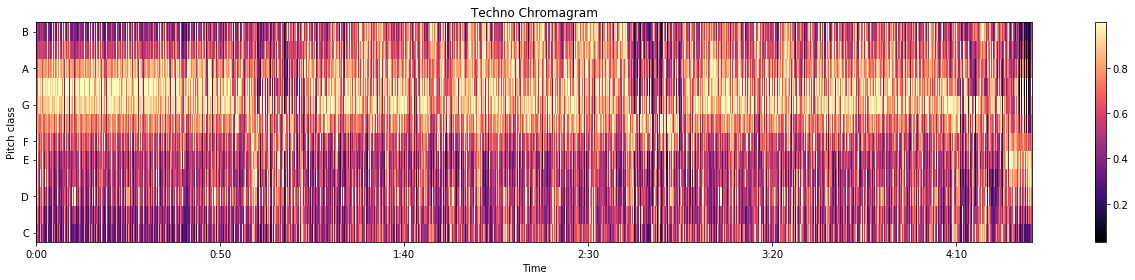

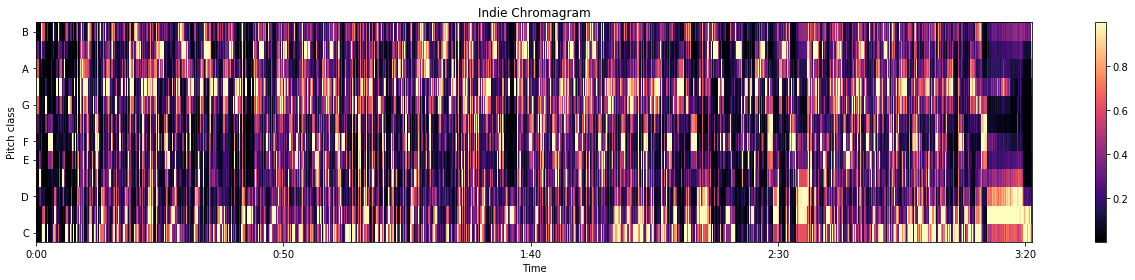

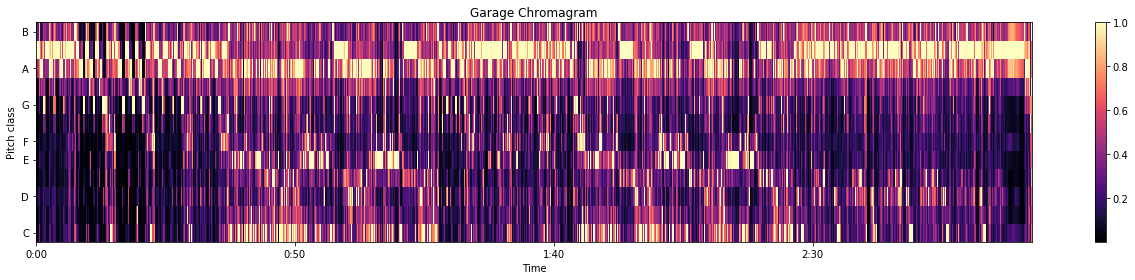

In [14]:
plot_chroma(dnb, 'Drum and Bass')
plot_chroma(dubstep, 'Dubstep')
plot_chroma(house, 'House')
plot_chroma(techno, 'Techno')
plot_chroma(indie, 'Indie')
plot_chroma(garage, "Garage")

In [25]:
  # here kaiser_fast is a technique used for faster extraction
X, sample_rate = librosa.load(track_path, res_type='kaiser_fast') 

librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40)
  # we extract mfcc feature from data
# mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 


array([[-453.696     , -454.07397   , -445.49115   , ..., -456.3078    ,
        -456.3078    , -456.3078    ],
       [   3.6026587 ,    3.081675  ,   12.860264  , ...,    0.        ,
           0.        ,    0.        ],
       [   3.3360083 ,    2.855289  ,    6.9098988 , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   1.8276471 ,    2.3426454 ,    0.71240294, ...,    0.        ,
           0.        ,    0.        ],
       [   1.6126175 ,    2.1364892 ,   -1.2862594 , ...,    0.        ,
           0.        ,    0.        ],
       [   1.3429955 ,    1.8455629 ,   -2.1075888 , ...,    0.        ,
           0.        ,    0.        ]], dtype=float32)

In [6]:
tracks = [tracks for tracks in glob.glob("D:\MusicSubset\*\*.mp3")]    
song_list = [dict(EasyID3(tracks).items()) for tracks in tracks]  

In [7]:
track_df = pd.DataFrame(song_list)
track_df = track_df[['title', 'genre']] 
track_df.fillna('', inplace=True)                     # Title not necessary since I'll be adding file paths as well
track_df = track_df.astype(str)                       # All columns were lists of length 1 so converting to strings
track_df['title'] = track_df['title'].str.strip("[]") 
track_df['genre'] = track_df['genre'].str.strip("[]")
track_df.head()
track_df['file_path'] = tracks   # Adding column for file paths 
track_df.head()

,title,genre,file_path
0,'test','DnB',D:\MusicSubset\DnB\614music+dancingwithspirits...
1,'one04 866609','DnB',D:\MusicSubset\DnB\axaschaller+one04.mp3
2,'Dead or Alive','DnB',D:\MusicSubset\DnB\beatcomplot+deadoralive.mp3
3,'*DnB* Panacea 1Hit Free DL!!!','DnB',D:\MusicSubset\DnB\beatjunkierato+dnbpanacea1h...
4,'*Jungle* Sensi |#1Hit Free DL!!!','DnB',D:\MusicSubset\DnB\beatjunkierato+junglesensi1...


In [ ]:
track_df.to_csv('subset.csv', index=False)

### Modeling on a small subset of data

In [86]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Conv1D, Flatten, MaxPool1D
from tensorflow.keras import Sequential

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

C:\Users\flake\Anaconda3\envs\GA_DSI\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\flake\Anaconda3\envs\GA_DSI\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\flake\Anaconda3\envs\GA_DSI\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\flake\Anaconda3\envs\GA_DSI\lib\site-packages\tensorflow\pyth

In [2]:
def mfccs_parser(file):

    try:
        
          # here kaiser_fast is a technique used for faster extraction (though it does negatively affect quality)
        X, sample_rate = librosa.load(file, sr=42000, res_type='kaiser_fast') 
        
          # we extract mfcc feature from data, Use the mean so that scale isn't an issue.
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None

#     feature = mfccs
#     label = row

    return mfccs

In [57]:
def enhanced_chroma_parser(file):

    try:
    
    # Load in the song using kaiser_fast to speed up loading
        y, sr = librosa.load(file, sr=42000, res_type='kaiser_fast')
        
        chroma_os = librosa.feature.chroma_cqt(y=y, sr=sr, bins_per_octave=12*3)
        
        y_harm = librosa.effects.harmonic(y=y, margin=8)
        chroma_os_harm = librosa.feature.chroma_cqt(y=y_harm, sr=sr, bins_per_octave=12*3)
        
        chroma_filter = np.minimum(chroma_os_harm,
                           librosa.decompose.nn_filter(chroma_os_harm,
                                                       aggregate=np.median,
                                                       metric='cosine'))
        
        chroma_smooth = np.mean(scipy.ndimage.median_filter(chroma_filter, size=(1, 9)).T, axis=0)
    

        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None

#     feature = mfccs
#     label = row

    return chroma_smooth

In [ ]:
def static_tempo(file, bpm_estimate=120):
    
    y, sr = librosa.load(file, sr=42000, res_type="kaiser_fast")
    
    onset_env = librosa.onset.onset_strength(y, sr=sr)
    
    tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr, start_bpm=bpm_estimate)
    
    return tempo     

In [48]:
y, sr = librosa.load(r"D:\MusicSubset\DnB\614music+dancingwithspiritsfreedl.mp3", sr=42000, res_type='kaiser_fast')
chroma_os = librosa.feature.chroma_cqt(y=y, sr=sr, bins_per_octave=12*3)

In [49]:
y_harm = librosa.effects.harmonic(y=y, margin=8)
chroma_os_harm = librosa.feature.chroma_cqt(y=y_harm, sr=sr, bins_per_octave=12*3)

In [53]:
chroma_filter = np.minimum(chroma_os_harm,
                   librosa.decompose.nn_filter(chroma_os_harm,
                                               aggregate=np.median,
                                               metric='cosine'))

chroma_smooth = np.mean(scipy.ndimage.median_filter(chroma_filter, size=(1, 9)).T, axis=0)

In [55]:
chroma_smooth

array([0.3820424 , 0.19479815, 0.22647645, 0.33076098, 0.17315588,
       0.22886014, 0.36171056, 0.58209723, 0.57046919, 0.36039794,
       0.2723052 , 0.22168967])

In [47]:
# dnb_mfccs = enhanced_chroma_parser(r"D:\MusicSubset\DnB\614music+dancingwithspiritsfreedl.mp3")
# dnb_mfccs

(None, None)

In [57]:
# mfccs = np.empty((40,))
# for files in glob.glob("D:\MusicSubset\*\*.mp3"):
#     mfccs = np.vstack((mfccs, parser(files)))

(40,)

In [ ]:
# np.savetxt('subset_mfccs.npy', mfccs, delimiter=',')

In [ ]:
tempogram()

In [21]:
enhanced_chroma_parser(dnb)

Error encountered while parsing file:  D:\Music\DnB\beatjunkierato+dnbpanacea1hitfreedl.mp3


(None, None)

In [59]:
enh_chroma = np.empty((12 ,))
for files in glob.glob("D:\MusicSubset\*\*.mp3"):
    enh_chroma = np.vstack((enh_chroma, enhanced_chroma_parser(files)))

In [78]:
enh_chroma.shape

(240, 12)

In [72]:
np.savetxt('subset_enh_chroma.npy', enh_chroma, delimiter=',')

In [81]:
track_df = pd.read_csv('track_df.csv')

In [82]:
track_df = track_df[0:240]

In [83]:
mfccs = np.loadtxt('subset_mfccs.npy', delimiter= ',')

In [84]:
mfccs.shape

(240, 40)

In [109]:
X = mfccs
y = track_df['genre']

lb = LabelEncoder()

y = tf.keras.utils.to_categorical(lb.fit_transform(y), num_classes=6)

In [110]:
y.shape

(240, 6)

In [97]:
y= y.reshape(480,1)

In [98]:
y

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],

In [92]:
X = X.reshape((240, 40, 1))

In [93]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42, stratify=y )

In [94]:
ss = StandardScaler()

Xtrain_ss = ss.fit_transform(Xtrain)
Xtest_ss = ss.transform(Xtest)

ValueError: Found array with dim 3. StandardScaler expected <= 2.

In [10]:
print(Xtrain_ss.shape)
print(Xtest_ss.shape)
print(ytrain.shape)
print(ytest.shape)

(180, 40)
(60, 40)
(180, 6)
(60, 6)


In [80]:
enh_chroma.shape

(240, 12)

In [109]:
cnn_model = Sequential()

cnn_model.add(Conv1D(filters=6,
                     kernel_size=(2),
                     activation='relu',
                     input_shape=(40,1)))

cnn_model.add(MaxPool1D(pool_size = (2)))

cnn_model.add(Conv1D(16,
                     kernel_size=2,
                     activation='relu'))

cnn_model.add(MaxPool1D(pool_size=(2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(128,
                    activation='relu'))
cnn_model.add(Dropout(0.5))

cnn_model.add(Dense(6,
                    activation="softmax"))

cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [110]:
history = cnn_model.fit(Xtrain,
                        ytrain,
                        batch_size=18,
                        validation_data=(Xtest, ytest),
                        epochs=200,
                        verbose=0)

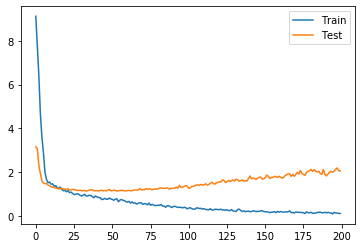

In [111]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend();

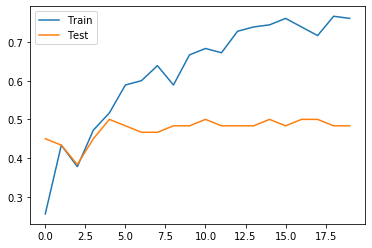

In [112]:
plt.plot(subset_history.history['accuracy'], label='Train')
plt.plot(subset_history.history['val_accuracy'], label='Test')
plt.legend();

In [82]:
model = Sequential()

model.add(Dense(256, input_shape=(40,), 
                       activation='relu'))
model.add(Dropout(0.5))


# model.add(Dense(256, 
#                        activation='relu'))
# model.add(Dropout(0.5))


model.add(Dense(6, 
                    activation='softmax'))

model.compile(
    loss='categorical_crossentropy', 
    metrics=['accuracy'], 
    optimizer='adam')

In [83]:
subset_history = model.fit(
    x=Xtrain_ss,
    y=ytrain,
    batch_size=18,
    epochs=20,
    validation_data=(Xtest_ss, ytest),
    verbose=0
)

In [59]:
subset_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

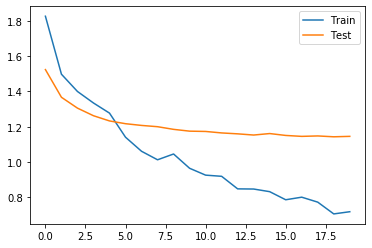

In [84]:
plt.plot(subset_history.history['loss'], label='Train')
plt.plot(subset_history.history['val_loss'], label='Test')
plt.legend();

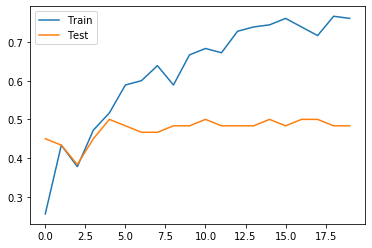

In [85]:
plt.plot(subset_history.history['accuracy'], label='Train')
plt.plot(subset_history.history['val_accuracy'], label='Test')
plt.legend();